In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [25]:
df['Sex'] = [1 if sex=='male' else 0 for sex in df['Sex']]

In [110]:
df.drop(columns=['Name','Parch','SibSp','Ticket','Cabin','Embarked'], inplace=True)

In [55]:
df.dropna(inplace=True)

In [111]:
df.corr()

,PassengerId,Survived,Sex,Age,Fare,Class_1,Class_2,Class_3
PassengerId,1.000000,0.148495,-0.025205,0.030933,0.029740,0.120969,-0.135955,-0.018703
Survived,0.148495,1.000000,-0.532418,-0.254085,0.134241,-0.006668,0.081391,-0.088158
Sex,-0.025205,-0.532418,1.000000,0.184969,-0.130433,0.062995,-0.071243,-0.009203
Age,0.030933,-0.254085,0.184969,1.000000,-0.092424,0.308880,-0.199340,-0.226143
Fare,0.029740,0.134241,-0.130433,-0.092424,1.000000,0.330206,-0.236404,-0.213634
Class_1,0.120969,-0.006668,0.062995,0.308880,0.330206,1.000000,-0.751190,-0.604415
Class_2,-0.135955,0.081391,-0.071243,-0.199340,-0.236404,-0.751190,1.000000,-0.071840
Class_3,-0.018703,-0.088158,-0.009203,-0.226143,-0.213634,-0.604415,-0.071840,1.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  183 non-null    int64   
 1   Survived     183 non-null    int64   
 2   Sex          183 non-null    int64   
 3   Age          183 non-null    float64 
 4   Fare         183 non-null    float64 
 5   Class_1      183 non-null    uint8   
 6   Class_2      183 non-null    uint8   
 7   Class_3      183 non-null    uint8   
 8   Age_Cat      183 non-null    category
dtypes: category(1), float64(2), int64(3), uint8(3)
memory usage: 9.5 KB


In [113]:
df.describe()

,PassengerId,Survived,Sex,Age,Fare,Class_1,Class_2,Class_3
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,0.519126,35.674426,78.682469,0.863388,0.081967,0.054645
std,247.052476,0.470725,0.501005,15.643866,76.347843,0.344380,0.275067,0.227909
min,2.000000,0.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,0.000000,24.000000,29.700000,1.000000,0.000000,0.000000
50%,457.000000,1.000000,1.000000,36.000000,57.000000,1.000000,0.000000,0.000000
75%,676.000000,1.000000,1.000000,47.500000,90.000000,1.000000,0.000000,0.000000
max,890.000000,1.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000


<BarContainer object of 183 artists>

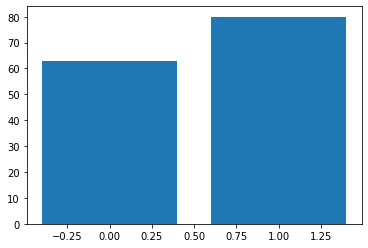

In [114]:
plt.bar(x=df['Sex'], height=df['Age'])

In [39]:
df = df.join(pd.get_dummies(df['Pclass'], prefix='Class'))
df.drop(columns=['Pclass'], inplace=True)

In [49]:
df['Age_Cat'] = pd.cut(df['Age'],bins=[0,2,13,17,35,65,99],labels=['Toddler/Baby','Child','Teenager', 'Young Adult','Adult','Elderly'])

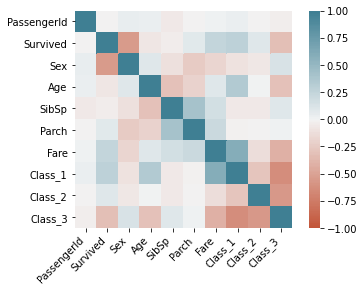

In [52]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<BarContainer object of 6 artists>

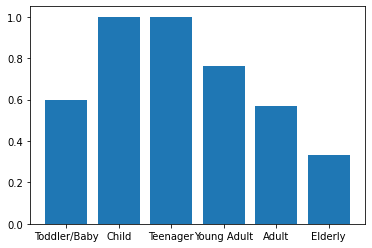

In [71]:
df_grouped = df[['Age_Cat','Survived']].groupby('Age_Cat').agg(np.mean).reset_index()
plt.bar(df_grouped['Age_Cat'], df_grouped['Survived'])

In [73]:
df['Sex'].corr(df['Age'])

0.18496898559123523

In [85]:
train = df.sample(frac=0.8)

In [106]:
test_index = set(df.index).symmetric_difference(set(train.index))
test_mask = [True if i in test_index else False for i in df.index]

In [108]:
df[test_mask]

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3,Age_Cat
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,C,1,0,0,Adult
23,24,1,"Sloper, Mr. William Thompson",1,28.00,0,0,113788,35.5000,A6,S,1,0,0,Young Adult
62,63,0,"Harris, Mr. Henry Birkhardt",1,45.00,1,0,36973,83.4750,C83,S,1,0,0,Adult
92,93,0,"Chaffee, Mr. Herbert Fuller",1,46.00,1,0,W.E.P. 5734,61.1750,E31,S,1,0,0,Adult
124,125,0,"White, Mr. Percival Wayland",1,54.00,0,1,35281,77.2875,D26,S,1,0,0,Adult
148,149,0,"Navratil, Mr. Michel (""Louis M Hoffman"")",1,36.50,0,2,230080,26.0000,F2,S,0,1,0,Adult
193,194,1,"Navratil, Master. Michel M",1,3.00,1,1,230080,26.0000,F2,S,0,1,0,Child
205,206,0,"Strom, Miss. Telma Matilda",0,2.00,0,1,347054,10.4625,G6,S,0,0,1,Toddler/Baby
245,246,0,"Minahan, Dr. William Edward",1,44.00,2,0,19928,90.0000,C78,Q,1,0,0,Adult
262,263,0,"Taussig, Mr. Emil",1,52.00,1,1,110413,79.6500,E67,S,1,0,0,Adult
